In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import csv, os, random, time
import itertools
import pandas as pd
import numpy as np
from collections import Counter
%matplotlib inline
from random import shuffle
from sklearn.metrics import precision_recall_fscore_support

C:\Users\nsak\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
def read_from_csv8(csv_file):
  """
  Reads our data from csv file that contains
  all 7 modulations(PDR-Attemts) on the same line
  """
  with open(csv_file) as csvfile:
    labeled = []
    reader = csv.reader(csvfile,delimiter=',')
    for row in reader:
        try:
            #print row[1:18]
            #print row[1],row[2],r
            labeled.append(row[1:18])#[float(row[1]),float(row[2]),float(row[3]),float(row[4])])
        except Exception as e:
            print(row,'exception:')
            print(e)
            print(csv_file)
  labeled.pop(0) #remove column descriptions
  return labeled

### Read our csv data

### Code for grouped pathologies

In [10]:
exp1_path = 'C:/Users/nsak/Desktop/Experiment Data/diplomatiki data 16-dim/exp1/experiments8.csv' 
exp2_path = 'C:/Users/nsak/Desktop/Experiment Data/diplomatiki data 16-dim/exp2/experiments8.csv'
exp4_capture_path = 'C:/Users/nsak/Desktop/Experiment Data/diplomatiki data 16-dim/exp4_captue/experiments8.csv'
exp4_hidden_path = 'C:/Users/nsak/Desktop/Experiment Data/diplomatiki data 16-dim/exp4_hidden/experiments8.csv'
exp5_oven_path = 'C:/Users/nsak/Desktop/Experiment Data/diplomatiki data 16-dim/exp5_oven/experiments8.csv'




exp2 = read_from_csv8(exp2_path) #Contention
exp6 = read_from_csv8(exp5_oven_path)   #Oven
#exp3 = read_from_csv8(exp3_path)

exp4 = read_from_csv8(exp4_capture_path) #Capture
exp5 = read_from_csv8(exp4_hidden_path) #Hidden
exp1 = read_from_csv8(exp1_path) #Low SNR

#Medium Contention
for instance in exp2:
    instance[16] = 1
for instance in exp6:
    instance[16] = 1
#Frame Loss
for instance in exp4:
    instance[16] = 2
for instance in exp5:
    instance[16] = 2
for instance in exp1:
    instance[16] = 2


#exp4 = exp4[:170]
#exp5 = exp5[:170]

print ("exp1 len: ",len(exp1),' exp2 len',len(exp2),' capture len:',len(exp4),' exp5 length: ',len(exp5),' exp6 length',len(exp6))
data = (exp1+exp2+exp4+exp5+exp6) #+exp3 parentheses may not be needed.
#X = [x[:16] for x in data if float(x)]

for elem in data:
    try:
        map(float,elem[:16])
    except Exception as e:
        print (e)
        print (elem)
        data.remove(elem)

#for x in data:
#    try:
#        X.append(map(float,x[:16]))
#    except Exception as e:
#        print e
X = [x[:16] for x in data]        
Y = [y[16] for y in data ]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=0)

#print X_train



exp1 len:  169  exp2 len 145  capture len: 240  exp5 length:  240  exp6 length 61


### Code for non grouped pathologies

In [4]:
exp1_path = 'C:/Users/nsak/Desktop/Experiment Data/diplomatiki data 16-dim/exp1/experiments8.csv' 
exp2_path = 'C:/Users/nsak/Desktop/Experiment Data/diplomatiki data 16-dim/exp2/experiments8.csv'
exp4_capture_path = 'C:/Users/nsak/Desktop/Experiment Data/diplomatiki data 16-dim/exp4_captue/experiments8.csv'
exp4_hidden_path = 'C:/Users/nsak/Desktop/Experiment Data/diplomatiki data 16-dim/exp4_hidden/experiments8.csv'
exp5_oven_path = 'C:/Users/nsak/Desktop/Experiment Data/diplomatiki data 16-dim/exp5_oven/experiments8.csv'


exp1 = read_from_csv8(exp1_path) #Low SNR
exp2 = read_from_csv8(exp2_path) #Contention
#exp3 = read_from_csv8(exp3_path)
exp4 = read_from_csv8(exp4_capture_path) #Capture
exp5 = read_from_csv8(exp4_hidden_path) #Hidden
exp6 = read_from_csv8(exp5_oven_path)   #Oven

#exp4 = exp4[:170]
#exp5 = exp5[:170]

print ("exp1 len: ",len(exp1),' exp2 len',len(exp2),' capture len:',len(exp4),' exp5 length: ',len(exp5),' exp6 length',len(exp6))
data = (exp1+exp2+exp4+exp5+exp6) #+exp3 parentheses may not be needed.
#X = [x[:16] for x in data if float(x)]

clean_data = []
for elem in data:
    try:
        if '+AC0-427.326' in elem:
            print(elem)
            data.remove(elem)
        map(float,elem[:16])
    except Exception as e:
        print (e)
        print (elem)
        data.remove(elem)

#for x in data:
#    try:
#        X.append(map(float,x[:16]))
#    except Exception as e:
#        print e
X = [x[:16] for x in data]        
Y = [y[16] for y in data ]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=0)

#print X_train



exp1 len:  169  exp2 len 145  capture len: 240  exp5 length:  240  exp6 length 61
['64.5958', '+AC0-427.326', '39.68', '84.6537', '43.445', '82.6377', '32.3', '66.1335', '32.495', '58.2281', '44.03', '55.0955', '35.52', '46.8848', '0.015', '97.2949', '5']


### Parameter estimation for Random Forest

In [19]:
from __future__ import print_function

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

print(__doc__)

# Set the parameters by cross-validation
#tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                     'C': [1, 10, 100, 1000]},
#                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

tuned_parameters = [{'n_estimators':[5,10,20,30,40],'criterion': ['gini','entropy'],
                     'max_features':['auto','sqrt','log2',4,8,12,14],'random_state':[6]}]
                    
scores = ['precision_macro', 'recall_macro','accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5,
                       scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    print("Accuracy Score")
    print()
    print(accuracy_score(y_true, y_pred))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision_macro

Best parameters set found on development set:

{'criterion': 'entropy', 'max_features': 8, 'n_estimators': 10, 'random_state': 6}

Grid scores on development set:

0.985 (+/-0.014) for {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 5, 'random_state': 6}
0.988 (+/-0.013) for {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 10, 'random_state': 6}
0.987 (+/-0.014) for {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 20, 'random_state': 6}
0.989 (+/-0.015) for {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 30, 'random_state': 6}
0.991 (+/-0.014) for {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 40, 'random_state': 6}
0.985 (+/-0.014) for {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 5, 'random_state': 6}
0.988 (+/-0.013) for {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 10, 'ra

Best parameters set found on development set:

{'criterion': 'entropy', 'max_features': 8, 'n_estimators': 10, 'random_state': 6}

Grid scores on development set:

0.985 (+/-0.022) for {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 5, 'random_state': 6}
0.988 (+/-0.019) for {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 10, 'random_state': 6}
0.988 (+/-0.015) for {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 20, 'random_state': 6}
0.989 (+/-0.019) for {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 30, 'random_state': 6}
0.993 (+/-0.009) for {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 40, 'random_state': 6}
0.985 (+/-0.022) for {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 5, 'random_state': 6}
0.988 (+/-0.019) for {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 10, 'random_state': 6}
0.988 (+/-0.015) for {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 20, 'random_s

### Random Forest Classifier

In [23]:
clf = RandomForestClassifier(criterion='entropy', n_estimators= 20, random_state= 6)
dt_start = time.time()
clf = clf.fit(X_train, y_train)

dt_end = time.time()
rf_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,rf_pred)
print("elapsed", dt_end-dt_start)
print("Random Forest accuracy is: ",accuracy)
print("(weighted)Precision %f, Recall %f, fscore %f , %s" %precision_recall_fscore_support(y_test, rf_pred, average='weighted'))

elapsed 0.06879138946533203
Random Forest accuracy is:  1.0
(weighted)Precision 1.000000, Recall 1.000000, fscore 1.000000 , None


### Param Tuning Decision Trees

In [12]:
from __future__ import print_function

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

print(__doc__)

# Set the parameters by cross-validation
#tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                     'C': [1, 10, 100, 1000]},
#                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

tuned_parameters = [
                    {'criterion':['gini','entropy'],'splitter': ['best','random'],
                     'min_samples_split':[2,3,4,10],'min_samples_leaf':[1,2,3,4,6,8],
                    'max_features':['auto','sqrt','log2',4,10,14]}
                    ]

scores = ['precision_macro', 'recall_macro','accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=5,
                       scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    print("Accuracy Score")
    print()
    print(accuracy_score(y_true, y_pred))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision_macro



C:\Users\nsak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Best parameters set found on development set:

{'criterion': 'gini', 'max_features': 14, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'}

Grid scores on development set:

0.972 (+/-0.020) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.981 (+/-0.026) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
0.965 (+/-0.017) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
0.974 (+/-0.032) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}
0.970 (+/-0.023) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'}
0.973 (+/-0.023) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'

Best parameters set found on development set:

{'criterion': 'entropy', 'max_features': 14, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}

Grid scores on development set:

0.961 (+/-0.027) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.973 (+/-0.020) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
0.986 (+/-0.015) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
0.949 (+/-0.037) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}
0.978 (+/-0.011) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'}
0.971 (+/-0.021) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'rand

Best parameters set found on development set:

{'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'}

Grid scores on development set:

0.968 (+/-0.026) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.974 (+/-0.018) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
0.966 (+/-0.034) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
0.981 (+/-0.045) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}
0.964 (+/-0.035) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'}
0.990 (+/-0.019) for {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'ran

### Decision trees classifier

In [11]:
clf = tree.DecisionTreeClassifier()
dt_start = time.time()
clf = clf.fit(X_train, y_train)
dt_end = time.time()
dt_elapsed = dt_end - dt_start

pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print("elapsed", dt_elapsed)
print ("Decision trees accuracy is: ",accuracy)
print ("(weighted)Precision %f, Recall %f, fscore %f , %s" %precision_recall_fscore_support(y_test, pred, average='weighted') )

elapsed 0.015626192092895508
Decision trees accuracy is:  0.9767441860465116
(weighted)Precision 0.976943, Recall 0.976744, fscore 0.976703 , None


### KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(np.asarray(X_train),np.asarray(y_train) )
pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print ("KNN: ",accuracy)

KNN:  1.0


### Parameter estimation for KNN

In [73]:
from __future__ import print_function

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

print(__doc__)

# Set the parameters by cross-validation
tuned_parameters = [{'n_neighbors':[3,5,7],'weights':['uniform','distance'],'algorithm': ['auto','brute'],
                     'p': [1, 2],'n_jobs': [2]},
                    {'n_neighbors':[3,5,7],'algorithm': ['ball_tree','kd_tree'], 'leaf_size': [3, 10, 30, 100],
                    'p': [1, 2],'n_jobs': [2]}]

scores = ['precision_macro', 'recall_macro','accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5,
                       scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    print("Accuracy Score")
    print()
    print(accuracy_score(y_true, y_pred))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision_macro

Best parameters set found on development set:

{'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 1, 'n_neighbors': 3, 'p': 1}

Grid scores on development set:

1.000 (+/-0.000) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 1, 'n_neighbors': 3, 'p': 1}
0.999 (+/-0.005) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 1, 'n_neighbors': 3, 'p': 2}
0.995 (+/-0.012) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 1, 'n_neighbors': 5, 'p': 1}
0.991 (+/-0.019) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 1, 'n_neighbors': 5, 'p': 2}
0.991 (+/-0.018) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 1, 'n_neighbors': 7, 'p': 1}
0.987 (+/-0.019) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 1, 'n_neighbors': 7, 'p': 2}
1.000 (+/-0.000) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 2, 'n_neighbors': 3, 'p': 1}
0.999 (+/-0.005) for {'algorithm': 'auto', '

Best parameters set found on development set:

{'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 1, 'n_neighbors': 3, 'p': 1}

Grid scores on development set:

1.000 (+/-0.000) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 1, 'n_neighbors': 3, 'p': 1}
0.999 (+/-0.004) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 1, 'n_neighbors': 3, 'p': 2}
0.995 (+/-0.013) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 1, 'n_neighbors': 5, 'p': 1}
0.983 (+/-0.049) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 1, 'n_neighbors': 5, 'p': 2}
0.991 (+/-0.016) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 1, 'n_neighbors': 7, 'p': 1}
0.979 (+/-0.046) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 1, 'n_neighbors': 7, 'p': 2}
1.000 (+/-0.000) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 2, 'n_neighbors': 3, 'p': 1}
0.999 (+/-0.004) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 2, 'n_neighbors': 3, 'p': 2}
0.995 (+/-0.013) for {'algorithm': 'auto', 'leaf_size': 3,

Best parameters set found on development set:

{'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 1, 'n_neighbors': 3, 'p': 1}

Grid scores on development set:

1.000 (+/-0.000) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 1, 'n_neighbors': 3, 'p': 1}
0.999 (+/-0.005) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 1, 'n_neighbors': 3, 'p': 2}
0.993 (+/-0.017) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 1, 'n_neighbors': 5, 'p': 1}
0.988 (+/-0.027) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 1, 'n_neighbors': 5, 'p': 2}
0.988 (+/-0.022) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 1, 'n_neighbors': 7, 'p': 1}
0.982 (+/-0.026) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 1, 'n_neighbors': 7, 'p': 2}
1.000 (+/-0.000) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 2, 'n_neighbors': 3, 'p': 1}
0.999 (+/-0.005) for {'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': 2, 'n_neighbors': 3, 'p': 2}
0.993 (+/-0.017) for {'algorithm': 'auto', 'leaf_size': 3,

### Parameter estimation for SVM

In [62]:
from __future__ import print_function

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision_macro', 'recall_macro','accuracy']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring=score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    print("Accuracy Score")
    print()
    print(accuracy_score(y_true, y_pred))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision_macro

Best parameters set found on development set:

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

1.000 (+/-0.000) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.962 (+/-0.024) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.994 (+/-0.018) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.998 (+/-0.005) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
1.000 (+/-0.000) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.998 (+/-0.005) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.979 (+/-0.007) for {'C': 1, 'kernel': 'linear'}
0.976 (+/-0.011) for {'C': 10, 'kernel': 'linear'}
0.976 (+/-0.013) for {'C': 100, 'kernel': 'linear'}
0.976 (+/-0.014) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The m

### SVM Classifier

In [58]:
clf = svm.SVC(kernel= 'linear') #'rbf')#'linear')
dt_start = time.time()
clf.fit(X_train, y_train)
dt_end = time.time()
svm_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,svm_pred)
print("elapsed ",dt_end-dt_start)
print ("SVC linear kernel accuracy is: ",accuracy)
print ("(weighted)Precision %f, Recall %f, fscore %f , %s" %precision_recall_fscore_support(y_test, svm_pred, average='weighted') )

elapsed  0.26317286491394043
SVC linear kernel accuracy is:  0.9457364341085271
(weighted)Precision 0.945557, Recall 0.945736, fscore 0.945509 , None


## Confusion matrix

In [43]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[19  0  0  0  0]
 [ 0 22  0  0  0]
 [ 1  0 40  1  0]
 [ 0  0  1 39  0]
 [ 0  0  0  0  6]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.  ]
 [0.02 0.   0.95 0.02 0.  ]
 [0.   0.   0.03 0.97 0.  ]
 [0.   0.   0.   0.   1.  ]]


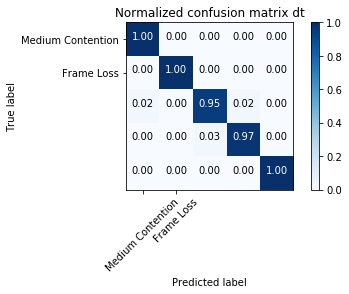

In [44]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

#class_names = ['low SNR','contention','capture','hidden','oven']
class_names = ['Medium Contention', "Frame Loss"]
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization dt')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix dt')

#plt.show()

Confusion matrix, without normalization
[[19  0  0  0  0]
 [ 0 22  0  0  0]
 [ 1  0 38  3  0]
 [ 0  0  3 37  0]
 [ 0  0  0  0  6]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.  ]
 [0.02 0.   0.9  0.07 0.  ]
 [0.   0.   0.07 0.93 0.  ]
 [0.   0.   0.   0.   1.  ]]


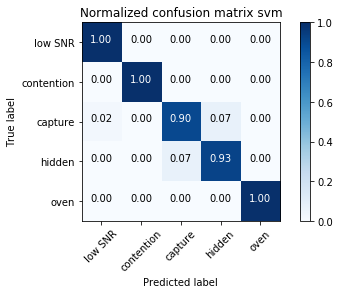

In [45]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, svm_pred)
np.set_printoptions(precision=2)

class_names = ['low SNR','contention','capture','hidden','oven']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization svm')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix svm')


Confusion matrix, without normalization
[[19  0  0  0  0]
 [ 0 22  0  0  0]
 [ 2  0 40  0  0]
 [ 0  0  1 39  0]
 [ 0  0  0  0  6]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.  ]
 [0.05 0.   0.95 0.   0.  ]
 [0.   0.   0.03 0.97 0.  ]
 [0.   0.   0.   0.   1.  ]]


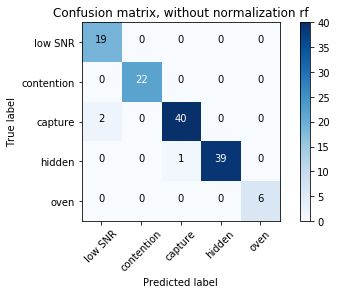

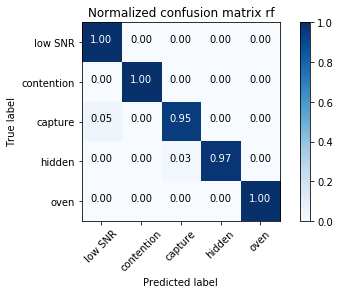

In [46]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rf_pred)
np.set_printoptions(precision=2)

class_names = ['low SNR','contention','capture','hidden','oven']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization rf')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix rf')


### Precision, Recall, f1-score

In [48]:
#from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

#target_names = ['l1','l2','l3','capture','hidden','oven','katiakom']
#print(classification_report(y_test, rf_pred, target_names=target_names))

print("(macro)   Precision %f, Recall %f, fscore %f , %s" %precision_recall_fscore_support(y_test, rf_pred, average='macro') )
print("(micro)   Precision %f, Recall %f, fscore %f , %s" %precision_recall_fscore_support(y_test, rf_pred, average='micro') )
print("(weighted)Precision %f, Recall %f, fscore %f , %s" %precision_recall_fscore_support(y_test, rf_pred, average='weighted') )

(macro)   Precision 0.976074, Recall 0.985476, fscore 0.980239 , None
(micro)   Precision 0.976744, Recall 0.976744, fscore 0.976744 , None
(weighted)Precision 0.978032, Recall 0.976744, fscore 0.976943 , None
